# 第10章　基于OpenCV的神经网络导论

## 用OpenCV训练基本人工神经网络

In [13]:
import cv2
import numpy as np
ann = cv2.ml.ANN_MLP_create()
ann.setLayerSizes(np.array([9, 15, 9], np.uint8))
ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 0.6, 1.0)
ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP, 0.1, 0.1)
ann.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 100, 1.0))
training_samples = np.array([[1.2, 1.3, 1.9, 2.2, 2.3, 2.9, 3.0, 3.2, 3.3]], np.float32)
layout = cv2.ml.ROW_SAMPLE
training_responses = np.array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], np.float32)
data = cv2.ml.TrainData_create(training_samples, layout, training_responses)
ann.train(data)
test_samples = np.array([[1.4, 1.5, 1.2, 2.0, 2.5, 2.8, 3.0, 3.1, 3.8]], np.float32)
prediction = ann.predict(test_samples)
print(prediction)

(2.0, array([[-0.08763029, -0.01616517,  1.1319623 ,  0.0402631 ,  0.05711843,
         0.16424464,  0.18130444,  0.1857026 , -0.07486832]],
      dtype=float32))


## 训练多阶段人工神经网络分类器

In [17]:
import cv2
import numpy as np
from random import randint, uniform
aninals_net = cv2.ml.ANN_MLP_create()
aninals_net.setLayerSizes(np.array([3, 30, 4], np.uint8))
aninals_net.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 0.6, 1.0)
aninals_net.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP, 0.1, 0.1)
aninals_net.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 100, 1.0))

def dog_sample():
    return [uniform(10.0, 20.0), uniform(1.0, 1.5), randint(38, 42)]

def dog_class():
    return [1, 0, 0, 0]

def condor_sample():
    return [uniform(3.0, 10.0), randint(3.0, 5.0), 0]

def condor_class():
    return [0, 1, 0, 0]

def dolphin_sample():
    return [uniform(30.0, 190.0), uniform(5.0, 15.0), randint(80, 100)]

def dolphin_class():
    return [0, 0, 1, 0]

def dragon_sample():
    return [uniform(1200.0, 1800.0), uniform(30.0, 40.0), randint(160, 180)]

def dragon_class():
    return [0, 0, 0, 1]

def record(sample, classification):
    return (np.array([sample], np.float32), np.array([classification], np.float32))

RECORDS = 20000
records = []
for x in range(0, RECORDS):
    records.append(record(dog_sample(), dog_class()))
    records.append(record(condor_sample(), condor_class()))
    records.append(record(dolphin_sample(), dolphin_class()))
    records.append(record(dragon_sample(), dragon_class()))

EPOCHS = 10
for e in range(0, EPOCHS):
    print(f"epoch {e}")
    for t, c in records:
        data = cv2.ml.TrainData_create(t, cv2.ml.ROW_SAMPLE, c)
        if aninals_net.isTrained():
            aninals_net.train(data, cv2.ml.ANN_MLP_UPDATE_WEIGHTS | cv2.ml.ANN_MLP_NO_INPUT_SCALE
 | cv2.ml.ANN_MLP_NO_OUTPUT_SCALE)
        else:
            aninals_net.train(data, cv2.ml.ANN_MLP_NO_INPUT_SCALE | cv2.ml.ANN_MLP_NO_OUTPUT_SCALE)

TESTS = 100
dog_results = 0
for x in range(0, TESTS):
    clas = int(aninals_net.predict(np.array([dog_sample()], np.float32))[0])
    print(f"class: {clas}")
    if clas == 0:
        dog_results += 1

condor_results = 0
for x in range(0, TESTS):
    clas = int(aninals_net.predict(np.array([condor_sample()], np.float32))[0])
    print(f"class: {clas}")
    if clas == 1:
        condor_results += 1

dolphin_results = 0
for x in range(0, TESTS):
    clas = int(aninals_net.predict(np.array([dolphin_sample()], np.float32))[0])
    print(f"class: {clas}")
    if clas == 2:
        dolphin_results += 1

dragon_results = 0
for x in range(0, TESTS):
    clas = int(aninals_net.predict(np.array([dragon_sample()], np.float32))[0])
    print(f"class: {clas}")
    if clas == 3:
        dragon_results += 1
    
print(f"dog accuracy {100.0 * dog_results / TESTS : .2f}")
print(f"condor accuracy {100.0 * condor_results / TESTS : .2f}")
print(f"dolphin accuracy {100.0 * dolphin_results / TESTS : .2f}")
print(f"dragon accuracy {100.0 * dragon_results / TESTS : .2f}")

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 2
class: 1
class: 1
cl

## 实现模块来训练人工神经网络

In [1]:
import gzip
import pickle
import cv2
import numpy as np

def load_data():
    mnist = gzip.open("data/mnist.pkl.gz", "rb")
    training_data, test_data = pickle.load(mnist)
    mnist.close()
    return (training_data, test_data)

def wrap_data():
    tr_d, te_d =load_data()
    training_inputs = tr_d[0]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    test_data = zip(te_d[0], te_d[1])
    return (training_data, test_data)

def vectorized_result(j):
    e = np.zeros((10,), np.float32)
    e[j] = 1.0
    return e

def create_ann(hidden_nodes=60):
    ann = cv2.ml.ANN_MLP_create()
    ann.setLayerSizes(np.array([784, hidden_nodes, 10]))
    ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 0.6, 1.0)
    ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP, 0.1, 0.1)
    ann.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 100, 1.0))
    return ann

def train(ann, samples=50000, epochs=10):
    tr, test = wrap_data()
    tr = list(tr)
    for epoch in range(epochs):
        print(f"Completed {epoch}/{epochs} epochs")
        counter = 0
        for img in tr:
            if (counter > samples):
                break
            if (counter % 100 == 0):
                print(f"Epoch {epoch}: Trained on {counter}/{samples} samples")
            counter += 1
            sample, response = img
            data = cv2.ml.TrainData_create(np.array([sample], dtype=np.float32), cv2.ml.ROW_SAMPLE, np.array([response], dtype=np.float32))
            if ann.isTrained():
                ann.train(data, cv2.ml.ANN_MLP_UPDATE_WEIGHTS | cv2.ml.ANN_MLP_NO_INPUT_SCALE | cv2.ml.ANN_MLP_NO_OUTPUT_SCALE)
            else:
                ann.train(data, cv2.ml.ANN_MLP_NO_INPUT_SCALE | cv2.ml.ANN_MLP_NO_OUTPUT_SCALE)
    print("Completed all epochs!")
    return ann, test

def predict(ann, sample):
    if sample.shape != (784,):
        if sample.shape != (28, 28):
            sample = cv2.resize(sample, (28, 28), interpolation=cv2.INTER_LINEAR)
        sample = sample.reshape(784,)
    return ann.predict(np.array([sample], np.float32))

def test(ann, test_data):
    num_tests =0
    num_correct = 0
    for img in test_data:
        num_tests += 1
        sample, correct_digit_class = img
        digit_class = predict(ann, sample)[0]
        if digit_class == correct_digit_class:
            num_correct += 1
    print(f"Accuracy: {(100.0 * num_correct /num_tests)}%")

ann, test_data = train(create_ann())
test(ann, test_data)

Completed 0/10 epochs
Epoch 0: Trained on 0/50000 samples
Epoch 0: Trained on 100/50000 samples
Epoch 0: Trained on 200/50000 samples
Epoch 0: Trained on 300/50000 samples
Epoch 0: Trained on 400/50000 samples
Epoch 0: Trained on 500/50000 samples
Epoch 0: Trained on 600/50000 samples
Epoch 0: Trained on 700/50000 samples
Epoch 0: Trained on 800/50000 samples
Epoch 0: Trained on 900/50000 samples
Epoch 0: Trained on 1000/50000 samples
Epoch 0: Trained on 1100/50000 samples
Epoch 0: Trained on 1200/50000 samples
Epoch 0: Trained on 1300/50000 samples
Epoch 0: Trained on 1400/50000 samples
Epoch 0: Trained on 1500/50000 samples
Epoch 0: Trained on 1600/50000 samples
Epoch 0: Trained on 1700/50000 samples
Epoch 0: Trained on 1800/50000 samples
Epoch 0: Trained on 1900/50000 samples
Epoch 0: Trained on 2000/50000 samples
Epoch 0: Trained on 2100/50000 samples
Epoch 0: Trained on 2200/50000 samples
Epoch 0: Trained on 2300/50000 samples
Epoch 0: Trained on 2400/50000 samples
Epoch 0: Traine

## 实现主模块

Completed 0/10 epochs
Epoch 0: Trained on 0/50000 samples
Epoch 0: Trained on 100/50000 samples
Epoch 0: Trained on 200/50000 samples
Epoch 0: Trained on 300/50000 samples
Epoch 0: Trained on 400/50000 samples
Epoch 0: Trained on 500/50000 samples
Epoch 0: Trained on 600/50000 samples
Epoch 0: Trained on 700/50000 samples
Epoch 0: Trained on 800/50000 samples
Epoch 0: Trained on 900/50000 samples
Epoch 0: Trained on 1000/50000 samples
Epoch 0: Trained on 1100/50000 samples
Epoch 0: Trained on 1200/50000 samples
Epoch 0: Trained on 1300/50000 samples
Epoch 0: Trained on 1400/50000 samples
Epoch 0: Trained on 1500/50000 samples
Epoch 0: Trained on 1600/50000 samples
Epoch 0: Trained on 1700/50000 samples
Epoch 0: Trained on 1800/50000 samples
Epoch 0: Trained on 1900/50000 samples
Epoch 0: Trained on 2000/50000 samples
Epoch 0: Trained on 2100/50000 samples
Epoch 0: Trained on 2200/50000 samples
Epoch 0: Trained on 2300/50000 samples
Epoch 0: Trained on 2400/50000 samples
Epoch 0: Traine

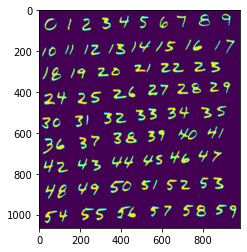

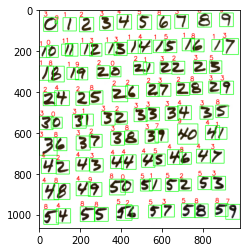

True

In [4]:
import cv2
import numpy as np
import digits_ann
from matplotlib import pyplot as plt
def inside(r1, r2):
    x1, y1, w1, h1 = r1
    x2, y2, w2, h2 = r2
    return (x1 > x2) and (y1 > y2) and (x1+w1 , x2+w2) and (y1+h1 < y2+h2)

def wrap_digit(rect, img_w, img_h):
    x, y, w, h = rect
    x_center = x + w // 2
    y_center = y + h // 2
    if (h > w):
        w = h
        x = x_center - (w // 2)
    else:
        h = w
        y = y_center - (h // 2)
    padding = 5
    x -= padding
    y -= padding
    w += 2 * padding
    h += 2* padding
    if x < 0:
        x = 0
    elif x > img_w:
        x = img_w
    if y < 0:
        y = 0
    elif y > img_h:
        y = img_h
    if x+w > img_w:
        w = img_w - x
    if y+h > img_h:
        h = img_h - y
    return x, y, w, h

ann , test_data = digits_ann.train(digits_ann.create_ann(60), 50000, 10)
img_path = "images/digits_0.jpg"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.GaussianBlur(gray, (7, 7), 0, gray)
ret , thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
erode_kernel = np.ones((2, 2), np.uint8)
thresh = cv2.erode(thresh, erode_kernel, thresh, iterations=2)
contours, hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rectangles = []
img_h, img_w = img.shape[:2]
img_area = img_w * img_h
for c in contours:
    a = cv2.contourArea(c)
    if a >= 0.98 * img_area <= 0.0001 * img_area:
        continue
    r = cv2.boundingRect(c)
    is_inside = False
    for q in rectangles:
        if inside(r, q):
            is_inside = True
            break
    if not is_inside:
        rectangles.append(r)
for r in rectangles:
    x, y, w, h = wrap_digit(r, img_w, img_h)
    roi = thresh[y:y+h, x:x+w]
    digit_class = int(digits_ann.predict(ann, roi)[0])
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, f"{digit_class}", (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.imshow(thresh)
plt.show()
plt.imshow(img)
plt.show()
cv2.imwrite("images/detected_and_classified_digits.png", img)

## 基于第三方深度神经网络的物体检测和分类

In [ ]:
import cv2
import numpy as np
model = cv2.dnn.readNetFromCaffe("data/objects_data/MobileNetSSD_deploy.prototxt","data/objects_data/MobileNetSSD_deploy.caffemodel")
blob_height = 300
color_scale = 1.0 / 127.5
average_color = (127.5, 127.5, 127.5)
confidence_threshold = 0.5
labels = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
          'car', 'cat', 'chair', 'cow', 'dining table', 'dog',
          'horse', 'motorbike', 'person', 'potted plant', 'sheep',
          'sofa', 'train', 'TV or monitor']
cap = cv2.VideoCapture(1)
success, frame = cap.read()
while success:
    h , w = frame.shape[:2]
    aspect_ratio = w / h
    blob_width = int(blob_height * aspect_ratio)
    blob_size = (blob_width, blob_height)
    blob = cv2.dnn.blobFromImage(frame, scalefactor=color_scale, size=blob_size, mean=average_color)
    model.setInput(blob)
    results = model.forward()
    for object in results[0, 0]:
        confidence = object[2]
        if confidence > confidence_threshold:
            x0, y0, x1, y1 = (object[3:7] * [w, h, w, h]).astype(int)
            id = int(object[1])
            label = labels[id - 1]
            cv2.rectangle(frame, (x0, y0), (x1, y1), (255, 0, 0), 2)
            text = f"{label} {confidence * 100.0:.1f}%"
            cv2.putText(frame, text, (x0, y0 - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow("Objects", frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
    success, frame = cap.read()

## 基于第三方深度神经网络的人脸检测和分类

In [4]:
import cv2
import numpy as np
face_model = cv2.dnn.readNetFromCaffe("data/faces_data/detection/deploy.prototxt", "data/faces_data/detection/res10_300x300_ssd_iter_140000.caffemodel")
face_blob_height = 300
face_average_color = (104, 177, 123)
face_confidence_threshold = 0.995
age_model = cv2.dnn.readNetFromCaffe("data/faces_data/age_gender_classification/age_net_deploy.prototxt", "data/faces_data/age_gender_classification/age_net.caffemodel")
age_labels = ['0-2', '4-6', '8-12', '15-20',
              '25-32', '38-43', '48-53', '60+']
gender_model = cv2.dnn.readNetFromCaffe("data/faces_data/age_gender_classification/gender_net_deploy.prototxt", "data/faces_data/age_gender_classification/gender_net.caffemodel")
gender_labels = ["male", "female"]
age_gender_blob_size = (256, 256)
age_gender_average_image = np.load("data/faces_data/age_gender_classification/average_face.npy")
cap = cv2.VideoCapture(1)
success, frame = cap.read()
while success:
    h, w = frame.shape[:2]
    aspect_ratio = w / h
    face_blob_width = int(face_blob_height * aspect_ratio)
    face_blob_size = (face_blob_width, face_blob_height)
    face_blob = cv2.dnn.blobFromImage(frame, size=face_blob_size, mean=face_average_color)
    face_model.setInput(face_blob)
    face_results = face_model.forward()
    for object in face_results[0, 0]:
        face_confidence = object[2]
        if face_confidence > face_confidence_threshold:
            x0, y0, x1, y1 = (object[3:7] * [w, h, w, h]).astype(int)
            y1_roi = y0 + int(1.2*(y1-y0))
            x_margin = ((y1_roi-y0) - (x1-x0)) // 2
            x0_roi = x0 - x_margin
            x1_roi = x1 + x_margin
            if x0_roi < 0 or x1_roi > w or y0 < 0 or y1_roi > h:
                continue
            age_gender_roi = frame[y0:y1_roi, x0_roi:x1_roi]
            scaled_age_gender_roi = cv2.resize(age_gender_roi, age_gender_blob_size, interpolation=cv2.INTER_LINEAR).astype(np.float32)
            scaled_age_gender_roi[:] -= age_gender_average_image
            age_gender_blob = cv2.dnn.blobFromImage(scaled_age_gender_roi, size=age_gender_blob_size)
            age_model.setInput(age_gender_blob)
            age_results = age_model.forward()
            age_id = np.argmax(age_results)
            age_label = age_labels[age_id]
            age_confidence = age_results[0, age_id]
            gender_model.setInput(age_gender_blob)
            gender_results = gender_model.forward()
            gender_id = np.argmax(gender_results)
            gender_label = gender_labels[gender_id]
            gender_confidence = gender_results[0, gender_id]
            cv2.rectangle(frame, (x0, y0), (x1, y1), (255, 0, 0), 2)
            cv2.rectangle(frame, (x0_roi, y0), (x1_roi, y1_roi), (0, 255, 255), 2)

            text = f"{age_label} years {age_confidence * 100.0:.1f}% {gender_label} {gender_confidence * 100.0:.1f}%"
            cv2.putText(frame, text, (x0_roi, y0 - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    cv2.imshow("Face, age, and gender", frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
    success, frame = cap.read()

: 